<a href="https://colab.research.google.com/github/rautnavnath/Data-Science-Machine-Learning-Projects/blob/main/IMDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [4]:
df=pd.read_csv('/content/Moldingdata.txt',';')

<ipython-input-4-7c37f81991bf>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df=pd.read_csv('/content/Moldingdata.txt',';')


In [5]:
df.head()

Melt temperature  Mold temperature  time_to_fill  ZDx - Plasticizing time  \
0        106.476184            80.617         7.124                     3.16   
1        105.505000            81.362         6.968                     3.16   
2        105.505000            80.411         6.864                     4.08   
3        106.474827            81.162         6.864                     3.16   
4        106.466140            81.471         6.864                     3.22   

   ZUx - Cycle time  SKx - Closing force  SKs - Clamping force peak value  \
0             74.83           886.900000                       904.000000   
1             74.81           919.409791                       935.900000   
2             74.81           908.600000                       902.344823   
3             74.82           879.410871                       902.033653   
4             74.83           885.644260                       902.821269   

   Ms - Torque peak value current cycle  Mm - Torque mean value current cycle  \
0                                 116.9                            104.300000   
1                                 113.9                            104.900000   
2                                 120.5                            106.503496   
3                                 127.3                            104.900000   
4                                 120.5                            106.700000   

   APSs - Specific back pressure peak value  \
0                                     145.6   
1                                     145.6   
2                                     147.0   
3                                     145.6   
4                                     145.6   

   APVs - Specific injection pressure peak value  \
0                                          922.3   
1                                          930.5   
2                                          933.1   
3                                          922.3   
4                                          917.5   

   CPn - Screw position at the end of hold pressure  SVo - Shot volume  \
0                                              8.82              18.73   
1                                              8.59              18.73   
2                                              8.80              18.98   
3                                              8.85              18.73   
4                                              8.80              18.75   

   quality  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0

4 categoroes of quality
1. 1=scrap
2. 2=OK
3. 3=OK
4. 4=OK but Inefficient

In [6]:
df['quality'].value_counts()

2.0    406
1.0    370
4.0    365
3.0    310
Name: quality, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Melt temperature                                  1451 non-null   float64
 1   Mold temperature                                  1451 non-null   float64
 2   time_to_fill                                      1451 non-null   float64
 3   ZDx - Plasticizing time                           1451 non-null   float64
 4   ZUx - Cycle time                                  1451 non-null   float64
 5   SKx - Closing force                               1451 non-null   float64
 6   SKs - Clamping force peak value                   1451 non-null   float64
 7   Ms - Torque peak value current cycle              1451 non-null   float64
 8   Mm - Torque mean value current cycle              1451 non-null   float64
 9   APSs - Specific bac

In [8]:
df.describe()

Melt temperature  Mold temperature  time_to_fill  \
count       1451.000000       1451.000000   1451.000000   
mean         106.892040         81.326023      7.459043   
std            5.615773          0.428813      1.688106   
min           81.747000         78.409000      6.084000   
25%          105.914500         81.123500      6.292000   
50%          106.089000         81.327000      6.968000   
75%          106.263000         81.441000      7.124000   
max          155.032000         82.159000     11.232000   

       ZDx - Plasticizing time  ZUx - Cycle time  SKx - Closing force  \
count              1451.000000       1451.000000          1451.000000   
mean                  3.234173         75.218794           901.974834   
std                   0.343230          0.432761            11.098192   
min                   2.780000         74.780000           876.700000   
25%                   3.000000         74.820000           893.600000   
50%                   3.192600         74.830000           902.400000   
75%                   3.290000         75.650000           909.400000   
max                   6.610000         75.790000           930.600000   

       SKs - Clamping force peak value  Ms - Torque peak value current cycle  \
count                      1451.000000                           1451.000000   
mean                        919.351778                            116.716747   
std                          10.780023                              5.029085   
min                         894.800000                             94.200000   
25%                         914.400000                            114.200000   
50%                         918.800000                            116.900000   
75%                         926.300000                            120.200000   
max                         946.500000                            130.300000   

       Mm - Torque mean value current cycle  \
count                           1451.000000   
mean                             104.163904   
std                                4.802195   
min                               76.500000   
25%                              103.550000   
50%                              105.200000   
75%                              106.531415   
max                              114.900000   

       APSs - Specific back pressure peak value  \
count                               1451.000000   
mean                                 146.230048   
std                                    0.804894   
min                                  144.800000   
25%                                  145.600000   
50%                                  146.100000   
75%                                  146.700000   
max                                  150.500000   

       APVs - Specific injection pressure peak value  \
count                                    1451.000000   
mean                                      900.972846   
std                                        25.519215   
min                                       780.500000   
25%                                       886.650000   
50%                                       906.800000   
75%                                       918.900000   
max                                       943.000000   

       CPn - Screw position at the end of hold pressure  SVo - Shot volume  \
count                                       1451.000000        1451.000000   
mean                                           8.808863          18.756285   
std                                            0.097238           0.095528   
min                                            8.330000          18.510000   
25%                                            8.770000          18.710000   
50%                                            8.820000          18.750000   
75%                                            8.850000          18.790000   
max                                            9.060000          19.230000   

    

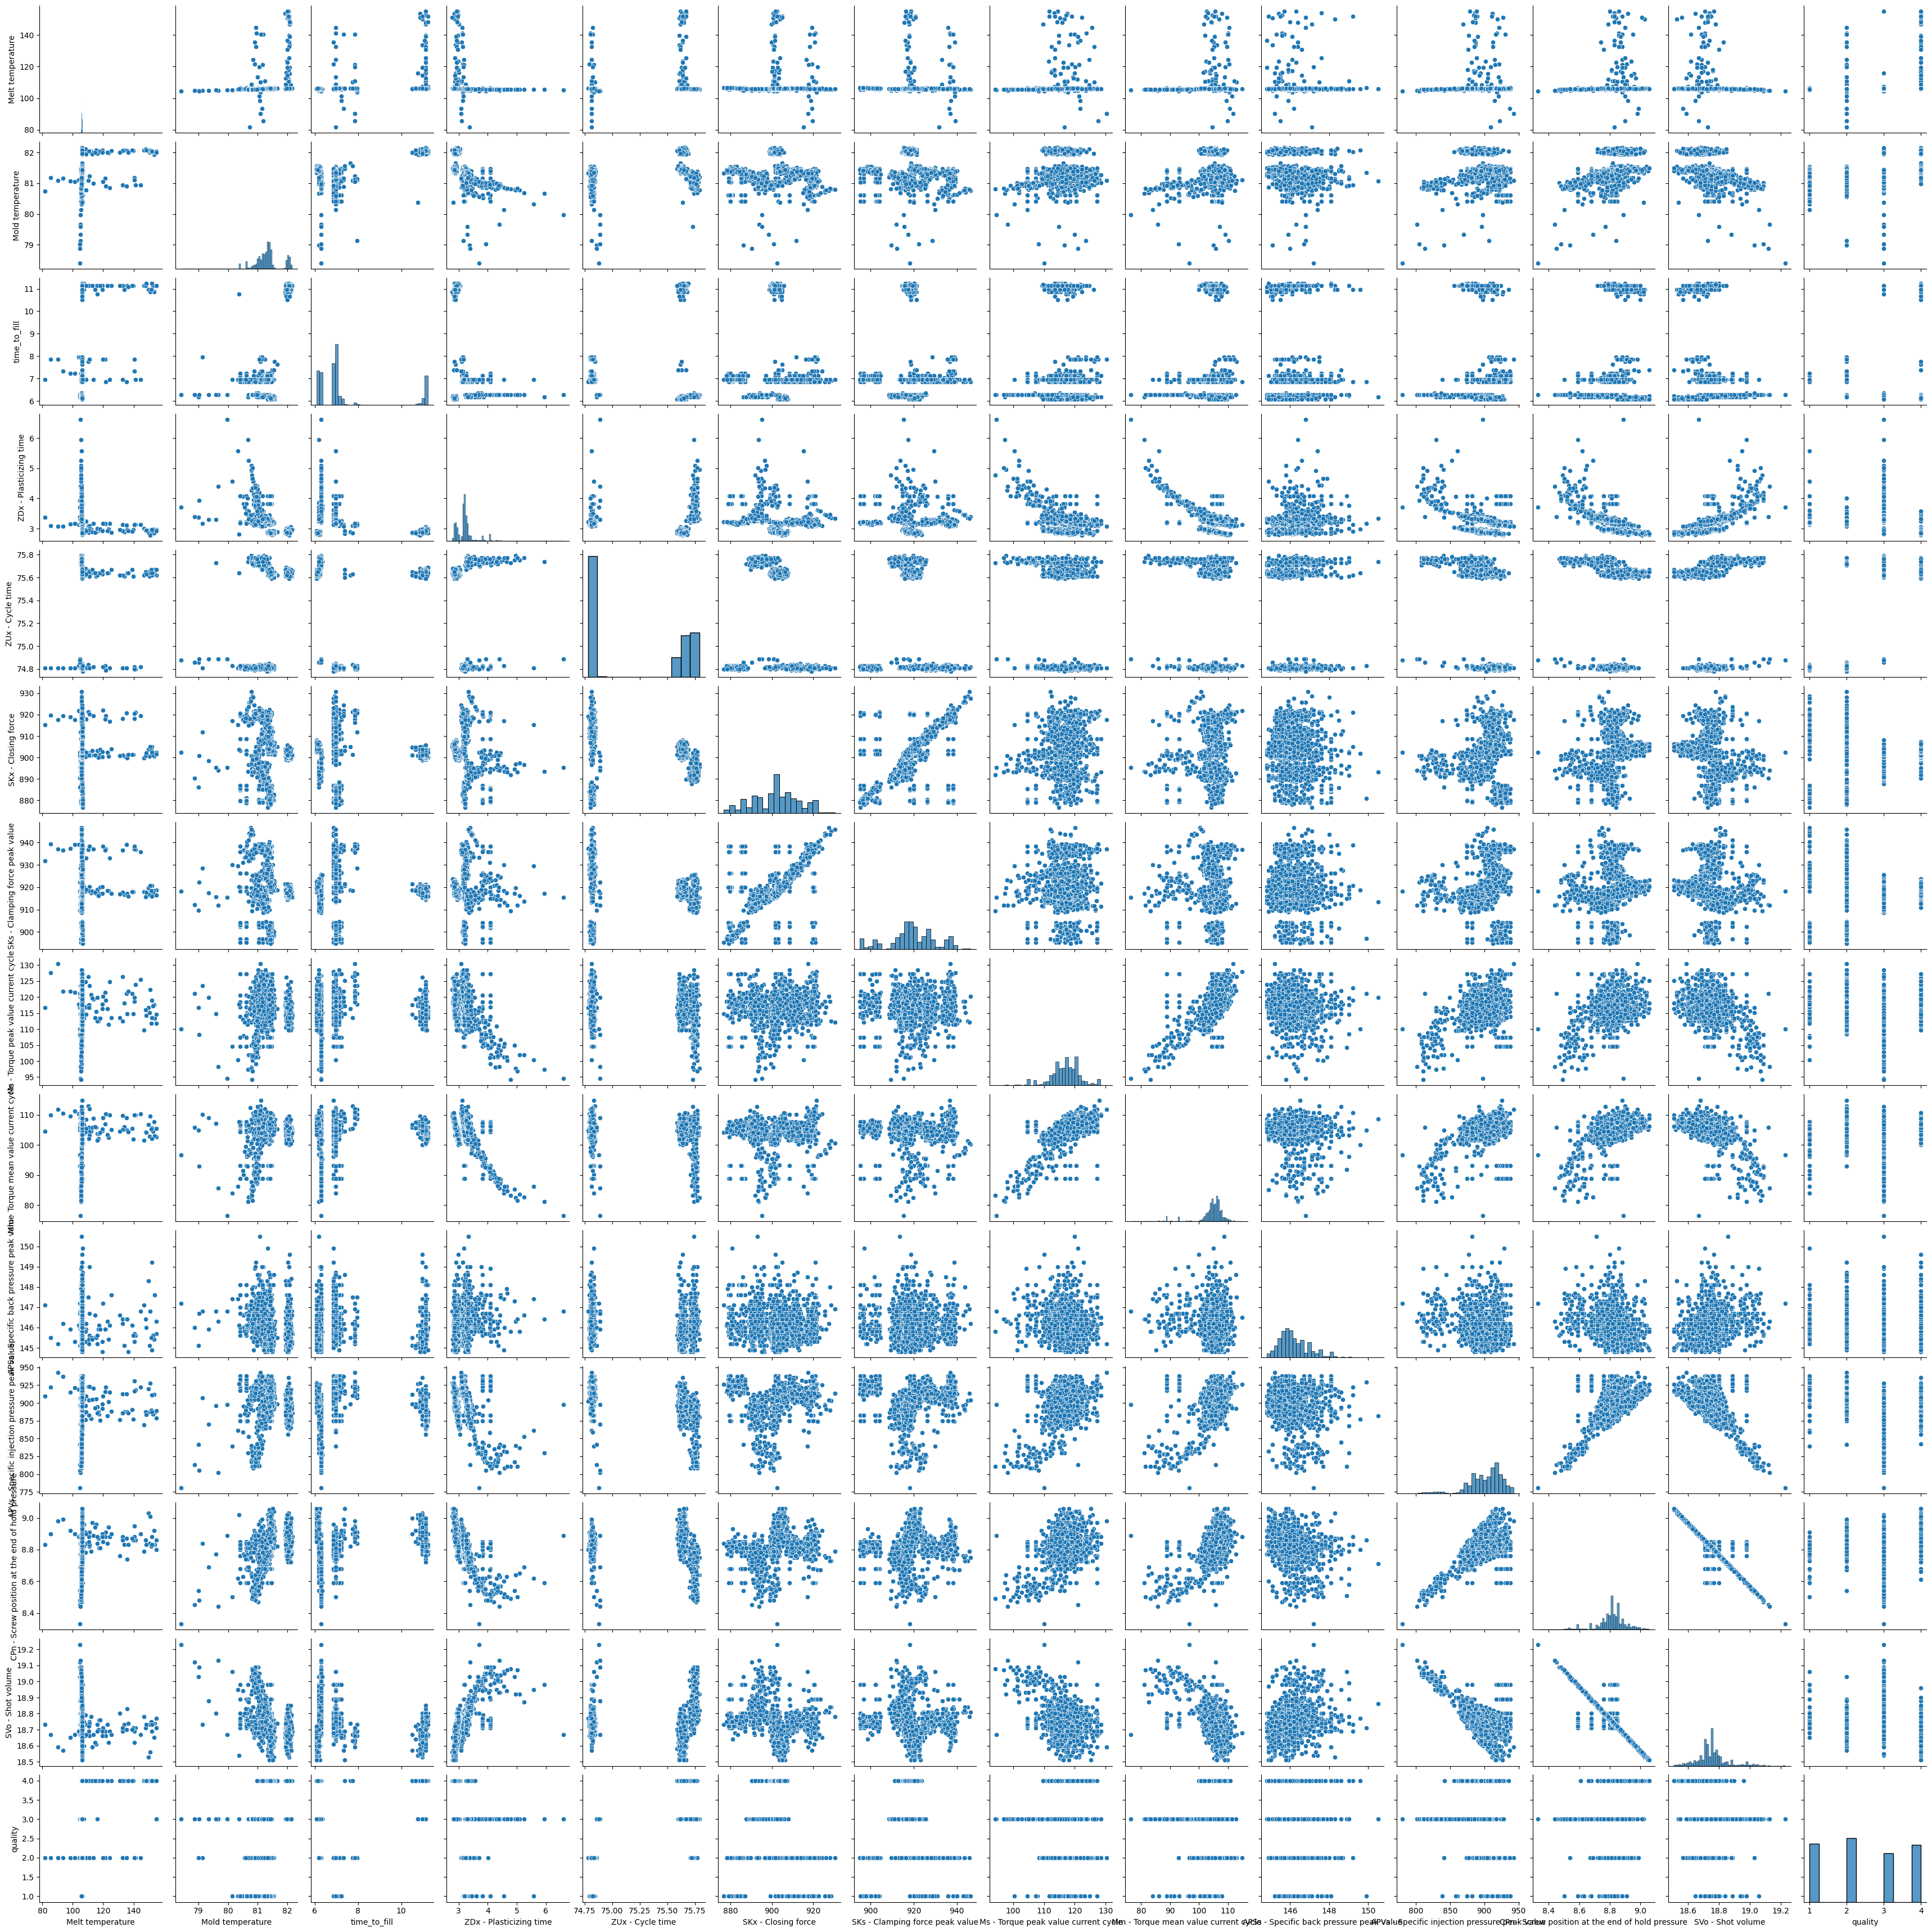

In [9]:
sns.pairplot(df)

<Axes: >

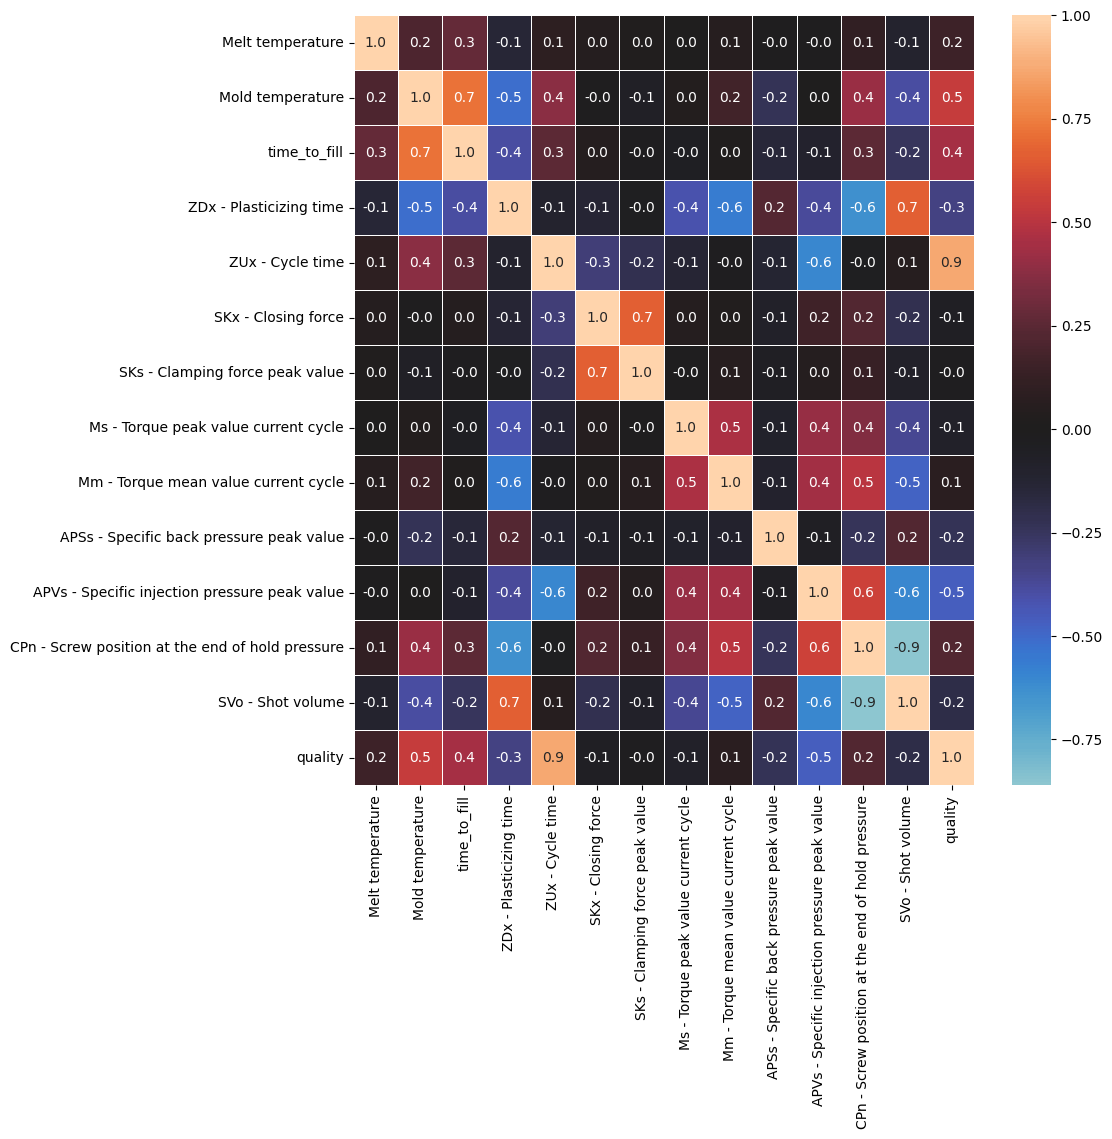

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), center=0, annot= True, linewidths=0.5 ,fmt=".1f", ax=ax)

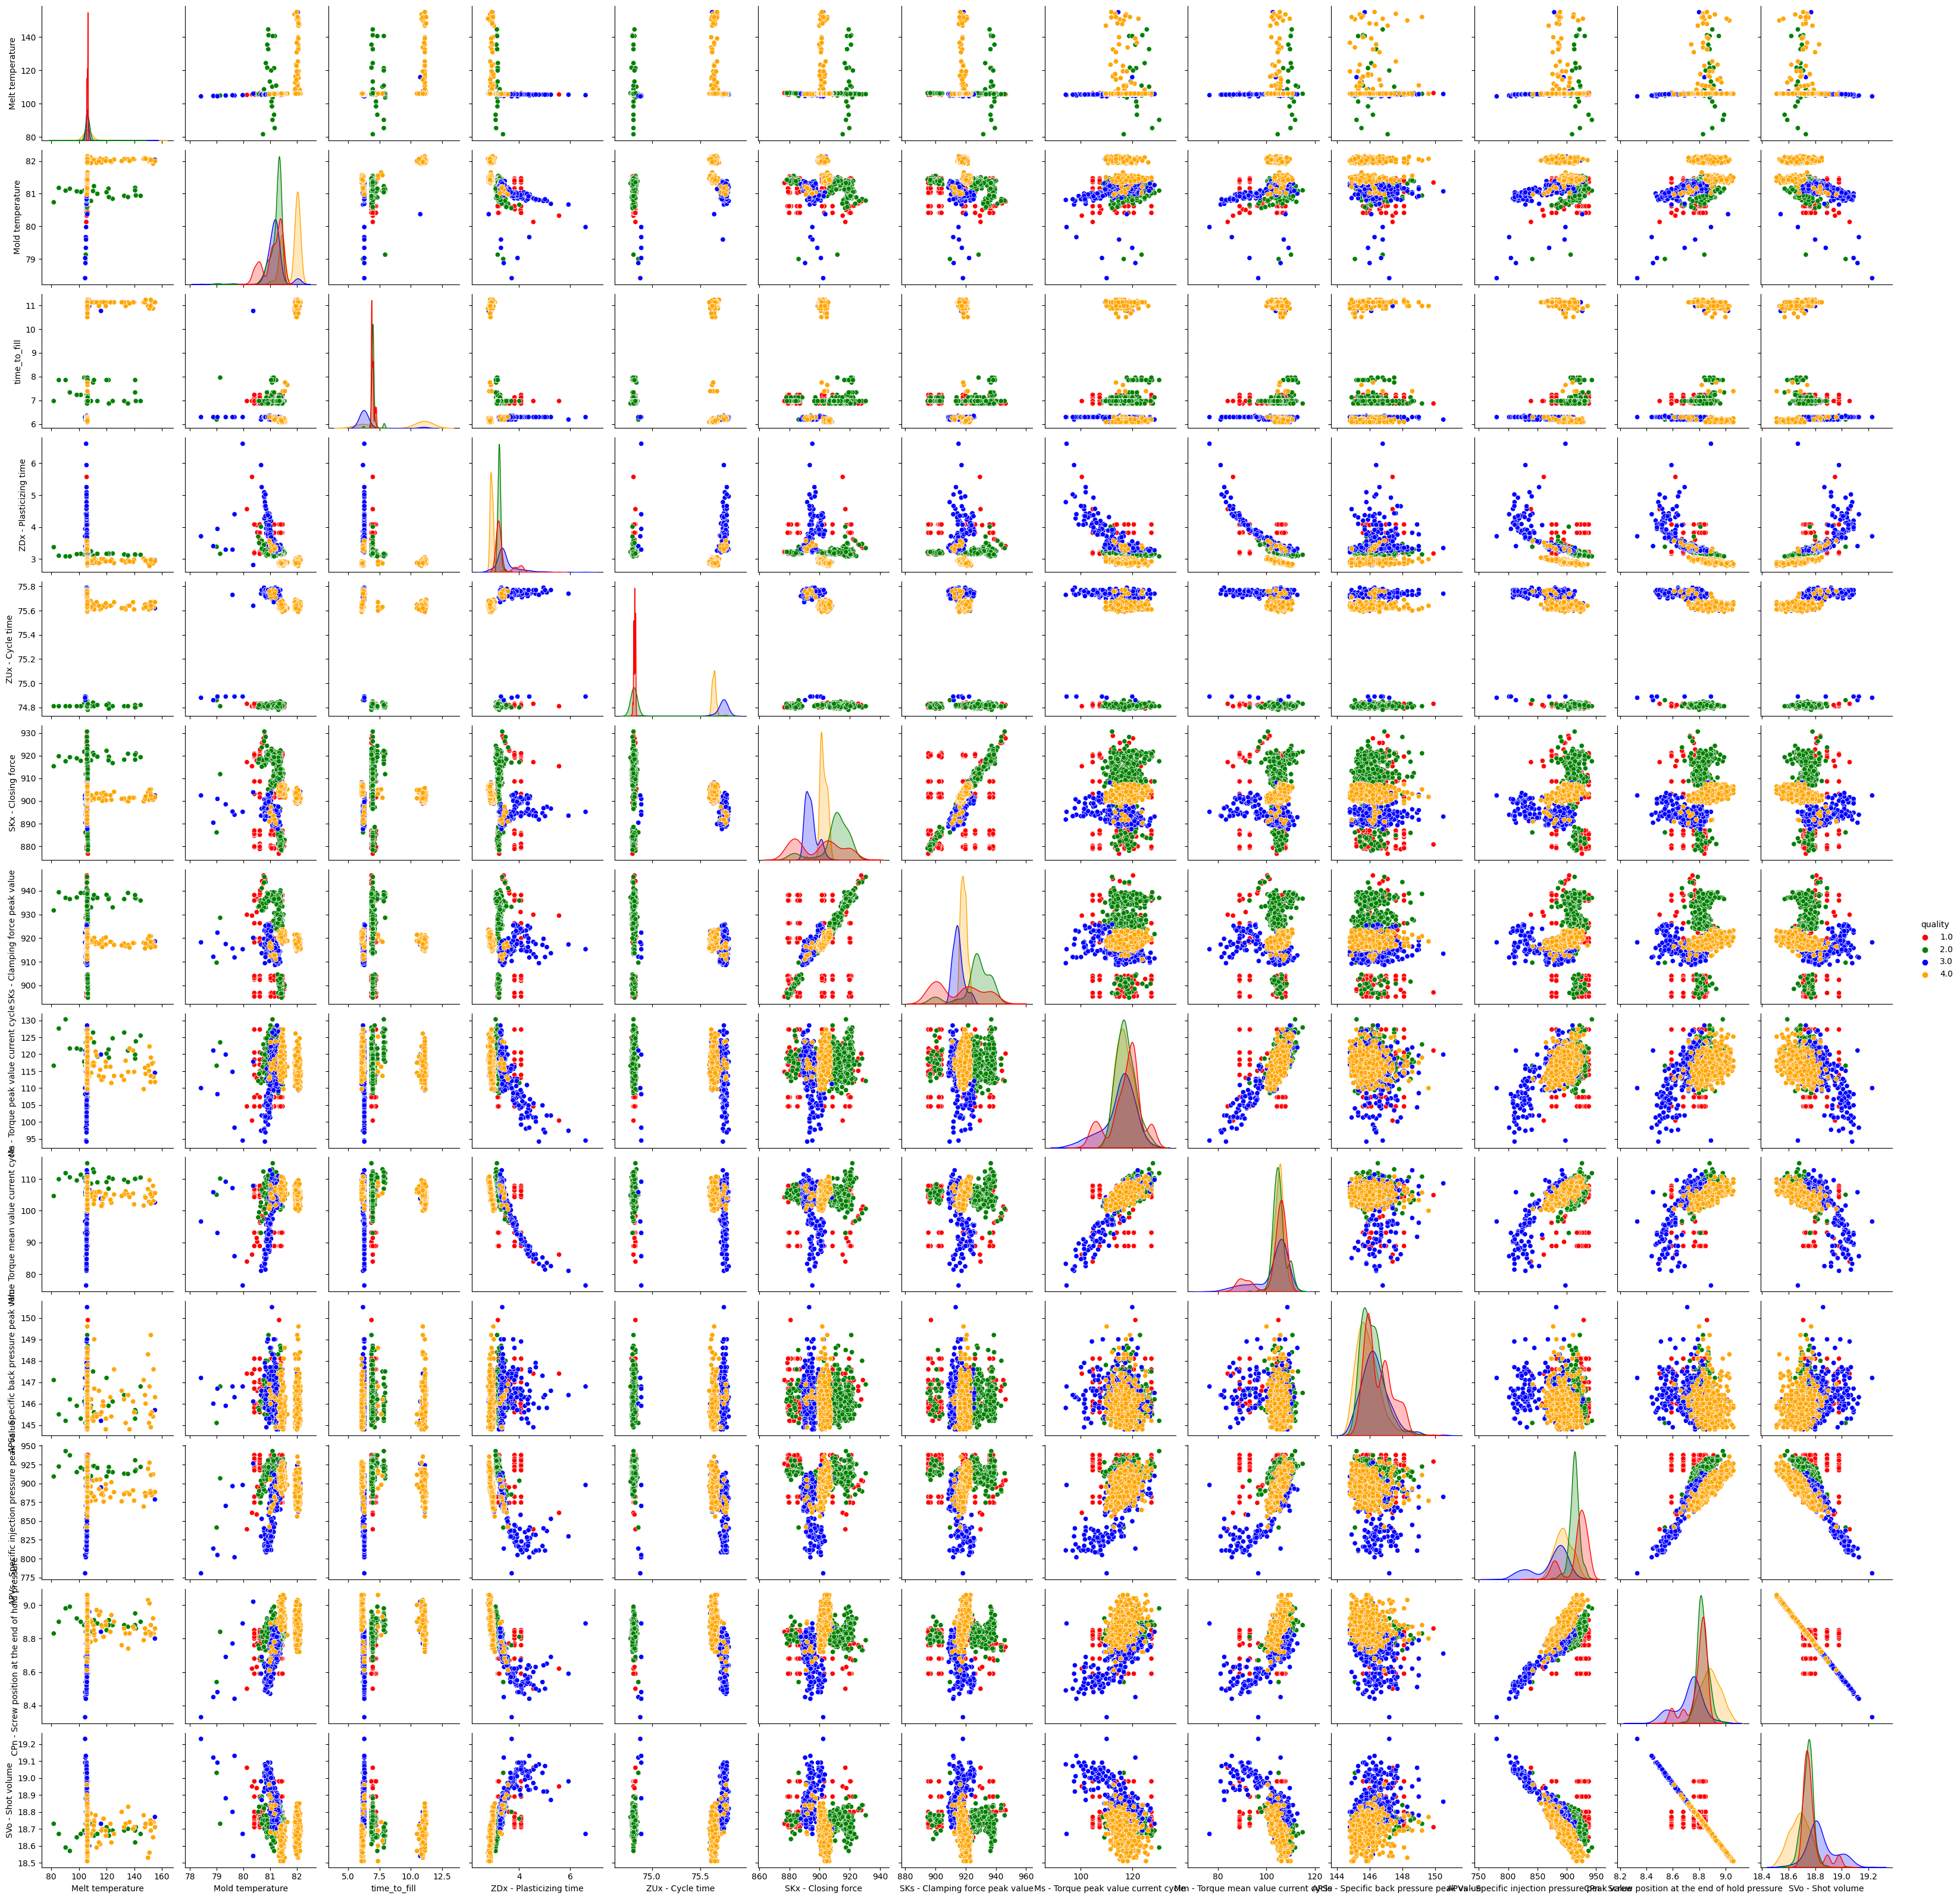

In [11]:
sns.pairplot(df, hue="quality", palette={1:'Red',2:'Green', 3: 'Blue', 4:'Orange'})

In [12]:
x=df.drop(columns='quality')

In [13]:
y=df['quality']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
clf = DecisionTreeClassifier(random_state=42)

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
y_pred = clf.predict(X_test)

## Evaluate the model

In [18]:
accuracy = accuracy_score(y_test, y_pred)

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [20]:
report = classification_report(y_test, y_pred)

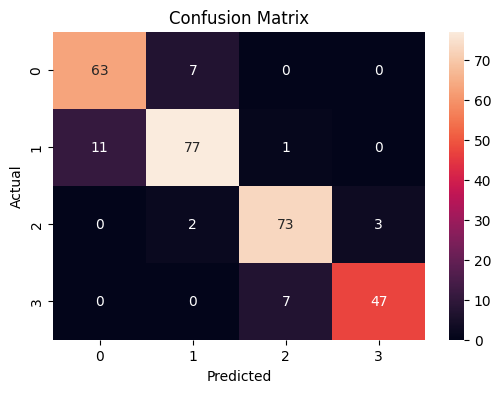

In [21]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 0.89
Confusion Matrix:
[[63  7  0  0]
 [11 77  1  0]
 [ 0  2 73  3]
 [ 0  0  7 47]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.85      0.90      0.88        70
         2.0       0.90      0.87      0.88        89
         3.0       0.90      0.94      0.92        78
         4.0       0.94      0.87      0.90        54

    accuracy                           0.89       291
   macro avg       0.90      0.89      0.89       291
weighted avg       0.89      0.89      0.89       291



#Applying Random Forest

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

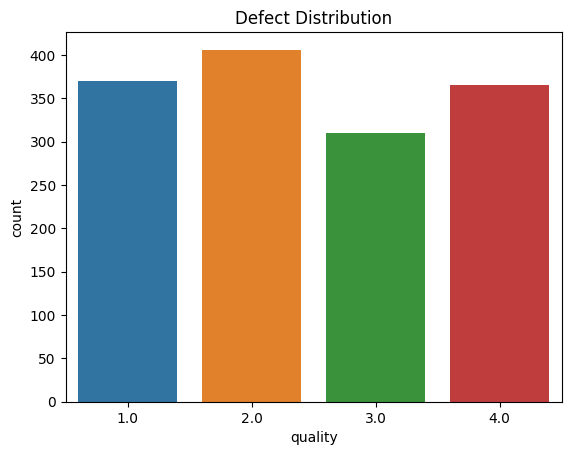

In [24]:
# Visualize target variable distribution
sns.countplot(x=df['quality'])
plt.title('Defect Distribution')
plt.show()

In [25]:
# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
#  Build the Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train1, y_train1)

RandomForestClassifier(random_state=42)

In [27]:
# Step 4: Evaluate the Model
y_pred1 = rf_classifier.predict(X_test1)


In [28]:
# Calculate accuracy
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Accuracy: {:.2f}%".format(accuracy1 * 100))

Accuracy: 93.81%


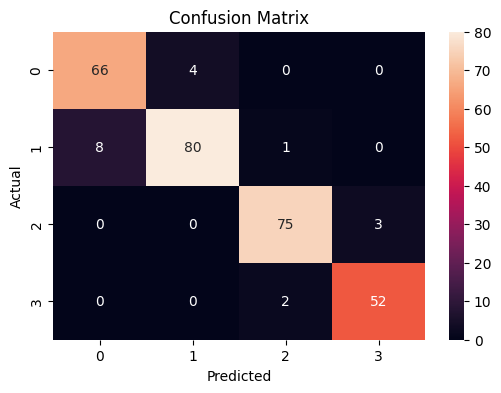

In [29]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
# Classification Report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

         1.0       0.89      0.94      0.92        70
         2.0       0.95      0.90      0.92        89
         3.0       0.96      0.96      0.96        78
         4.0       0.95      0.96      0.95        54

    accuracy                           0.94       291
   macro avg       0.94      0.94      0.94       291
weighted avg       0.94      0.94      0.94       291



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


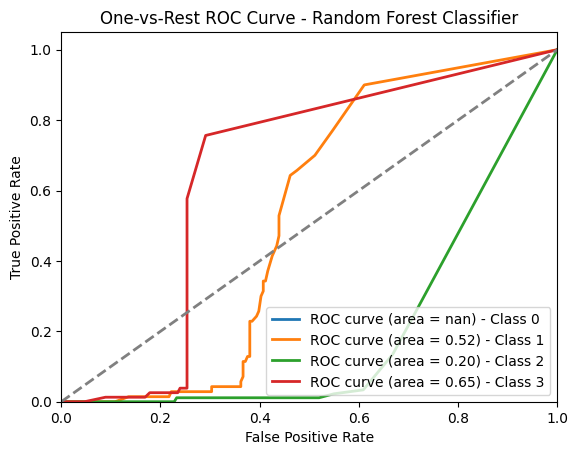

In [31]:
y_prob = rf_classifier.predict_proba(X_test)

# Compute ROC curve and AUC for each class (One-vs-Rest approach)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure()

for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) - Class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


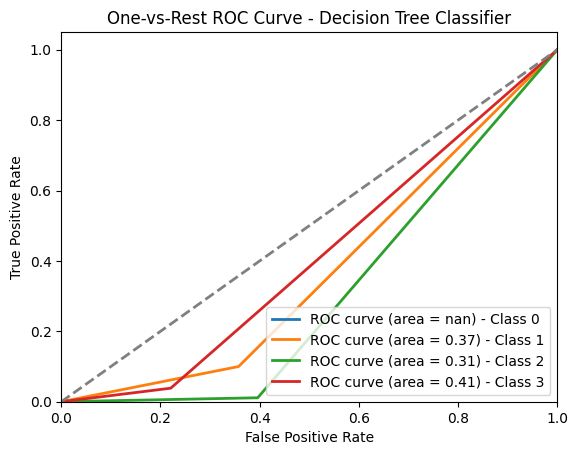

In [32]:
y_prob1 = clf.predict_proba(X_test1)

# Compute ROC curve and AUC for each class (One-vs-Rest approach)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test1 == i, y_prob1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure()

for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) - Class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curve - Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()


#To Define Process Window (USL/LSL)

In [33]:
#upper_limits = x[df['quality'] == 1].min()
#lower_limits = x[df['quality'] == 1].max()
upper_limits = x[(df['quality'] == 2 )|(df['quality'] == 3)].min()
lower_limits = x[(df['quality'] == 2 )|(df['quality'] == 3)].max()
Range=abs(upper_limits-lower_limits)
pd.concat([upper_limits,lower_limits,Range], axis=1)

0        1        2
Melt temperature                                   81.747  154.925   73.178
Mold temperature                                   78.409   82.138    3.729
time_to_fill                                        6.084   11.128    5.044
ZDx - Plasticizing time                             2.810    6.610    3.800
ZUx - Cycle time                                   74.780   75.790    1.010
SKx - Closing force                               878.000  930.600   52.600
SKs - Clamping force peak value                   894.800  945.900   51.100
Ms - Torque peak value current cycle               94.200  130.300   36.100
Mm - Torque mean value current cycle               76.500  114.900   38.400
APSs - Specific back pressure peak value          144.800  150.500    5.700
APVs - Specific injection pressure peak value     780.500  943.000  162.500
CPn - Screw position at the end of hold pressure    8.330    9.020    0.690
SVo - Shot volume                                  18.540   19.230    0.690

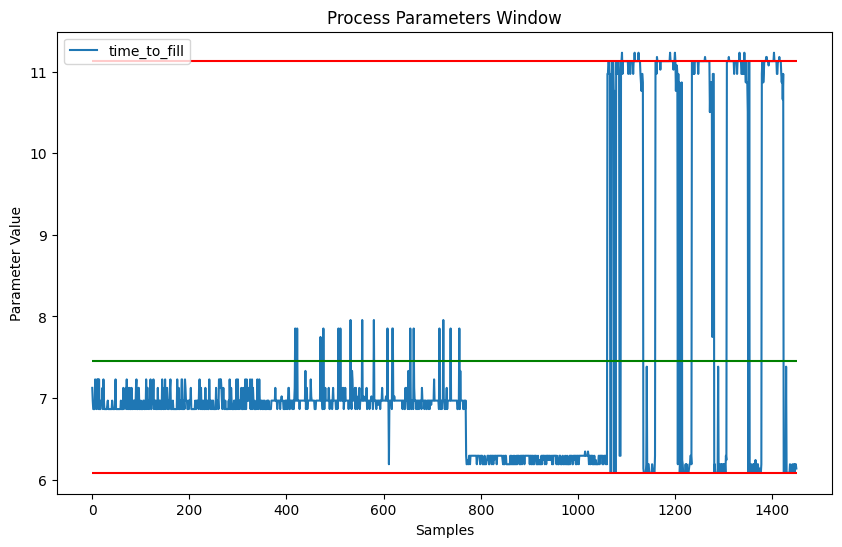

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(df['time_to_fill'], label='time_to_fill')
plt.hlines(upper_limits['time_to_fill'], xmin=0, xmax=len(df), color="red")
plt.hlines(lower_limits['time_to_fill'], xmin=0, xmax=len(df), color="red")
plt.hlines(df['time_to_fill'].mean(), xmin=0, xmax=len(df), color="green")
plt.legend()
plt.title('Process Parameters Window')
plt.xlabel('Samples')
plt.ylabel('Parameter Value')
plt.show()

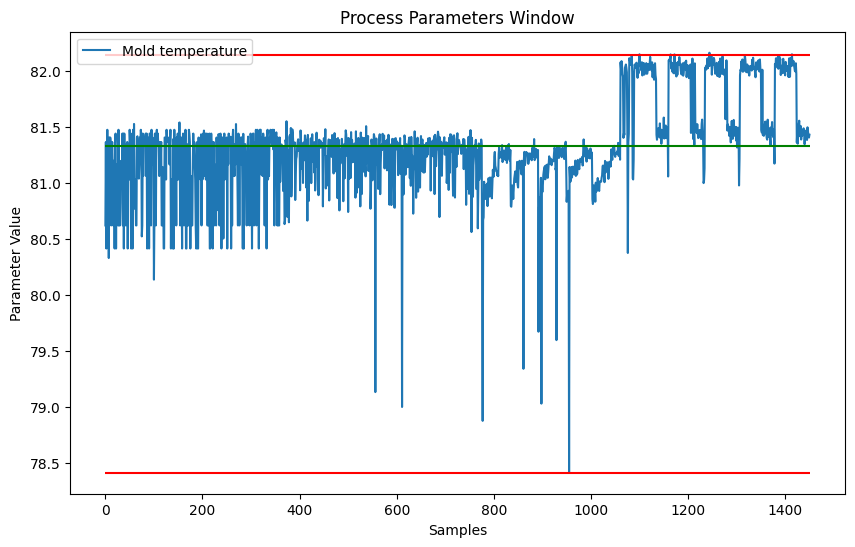

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(df['Mold temperature'], label='Mold temperature')
plt.hlines(upper_limits['Mold temperature'], xmin=0, xmax=len(df), color="red")
plt.hlines(lower_limits['Mold temperature'], xmin=0, xmax=len(df), color="red")
plt.hlines(df['Mold temperature'].mean(), xmin=0, xmax=len(df), color="green")
plt.legend()
plt.title('Process Parameters Window')
plt.xlabel('Samples')
plt.ylabel('Parameter Value')
plt.show()

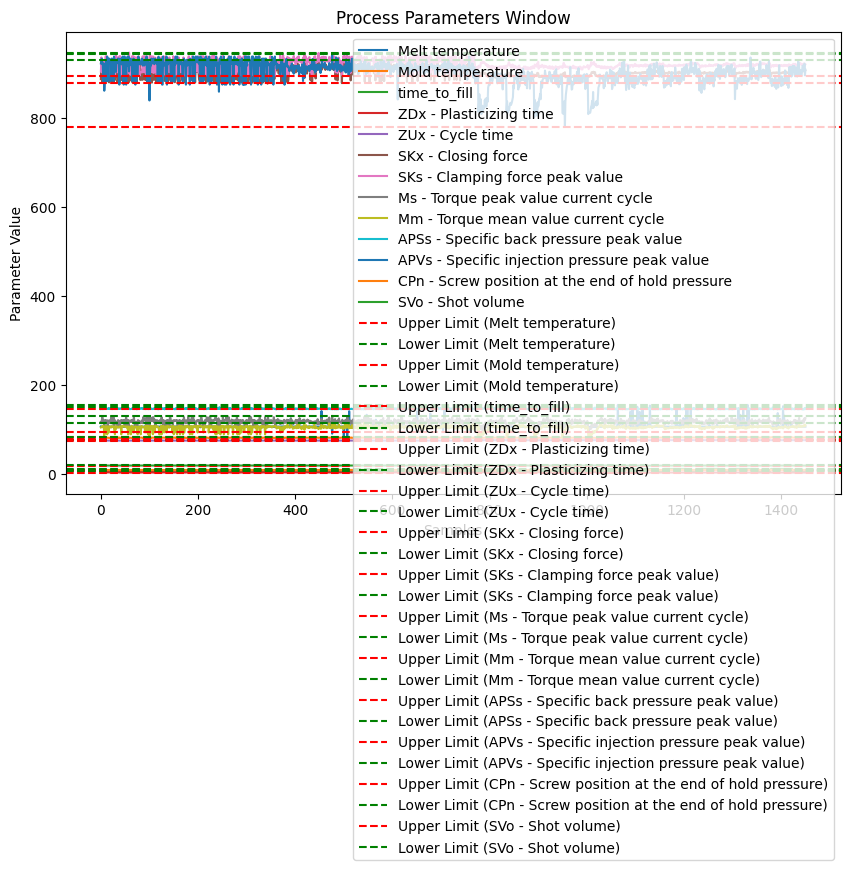

In [36]:


# Step 4: Visualize the Process Parameters Window
plt.figure(figsize=(10, 6))
for column in x.columns:
    plt.plot(df[column], label=column)

# Plot the upper and lower specification limits
for col, upper, lower in zip(x.columns, upper_limits, lower_limits):
    plt.axhline(upper, color='r', linestyle='dashed', label=f'Upper Limit ({col})')
    plt.axhline(lower, color='g', linestyle='dashed', label=f'Lower Limit ({col})')
plt.legend()
plt.title('Process Parameters Window')
plt.xlabel('Samples')
plt.ylabel('Parameter Value')
plt.show()
